In [2]:
import pandas as pd

In [4]:
df=pd.read_parquet("oyodata.parquet")

In [5]:
df.head()

,country_code,brand,contract_type,leadtime_days,occupancy_current,occupancy_ly,vacation_1,vacation_2,vacation_3,is_covid_period,...,occ_delta7,occ_delta14,occ_delta30,day,month,year,weekday,weekofyear,occupancy,predicted
0,14,1,1,366.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30,11,2023,3,48,0.038835,0.077052
1,14,1,1,365.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30,11,2023,3,48,0.038835,0.077052
2,14,1,1,364.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30,11,2023,3,48,0.038835,0.077052
3,14,1,1,363.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30,11,2023,3,48,0.038835,0.077052
4,14,1,1,362.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30,11,2023,3,48,0.038835,0.077052


In [6]:


# Read the CSV data
data = pd.read_csv('swedenstock.csv', header=None)

# Flatten the data into a single list
flattened_data = data.values.flatten()

# Reshape the data into a new DataFrame with two columns
reshaped_data = pd.DataFrame(flattened_data.reshape(-1, 2), columns=['Date', 'OMXS30'])

# Save the transformed data to a new CSV file
reshaped_data.to_csv('transformed_output.csv', index=False)


In [7]:
data=pd.read_csv('transformed_output.csv')

In [8]:
data.head()

,Date,OMXS30
0,02-01-2023,2374.540119
1,03-01-2023,2950.714306
2,04-01-2023,2731.993942
3,05-01-2023,2598.658484
4,06-01-2023,2156.018640


In [9]:
filtered_df = df[df['country_code'] == 14]


In [10]:
filtered_df['date'] = pd.to_datetime(filtered_df[['year', 'month', 'day']])

C:\Users\kumar\AppData\Local\Temp\ipykernel_14432\2575164464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df[['year', 'month', 'day']])


In [11]:
filtered_df.head()

,country_code,brand,contract_type,leadtime_days,occupancy_current,occupancy_ly,vacation_1,vacation_2,vacation_3,is_covid_period,...,occ_delta14,occ_delta30,day,month,year,weekday,weekofyear,occupancy,predicted,date
0,14,1,1,366.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,0.0,0.0,30,11,2023,3,48,0.038835,0.077052,2023-11-30
1,14,1,1,365.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,0.0,0.0,30,11,2023,3,48,0.038835,0.077052,2023-11-30
2,14,1,1,364.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,0.0,0.0,30,11,2023,3,48,0.038835,0.077052,2023-11-30
3,14,1,1,363.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,0.0,0.0,30,11,2023,3,48,0.038835,0.077052,2023-11-30
4,14,1,1,362.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,0.0,0.0,30,11,2023,3,48,0.038835,0.077052,2023-11-30


In [12]:
start_date = '2023-01-02'
end_date = '2023-12-31'
date_filtered_df = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59347773 entries, 0 to 59347772
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   country_code       int64  
 1   brand              int64  
 2   contract_type      int64  
 3   leadtime_days      float32
 4   occupancy_current  float32
 5   occupancy_ly       float32
 6   vacation_1         float32
 7   vacation_2         float32
 8   vacation_3         float32
 9   is_covid_period    float32
 10  occ_delta          float32
 11  occ_delta1         float32
 12  occ_delta3         float32
 13  occ_delta7         float32
 14  occ_delta14        float32
 15  occ_delta30        float32
 16  day                int16  
 17  month              int16  
 18  year               int16  
 19  weekday            int16  
 20  weekofyear         int16  
 21  occupancy          float64
 22  predicted          float64
dtypes: float32(13), float64(2), int16(5), int64(3)
memory usage: 5.6 GB


In [16]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [17]:
date_filtered_df = pd.DataFrame(filtered_df)

# Combine day, month, year into a single datetime column
date_filtered_df['Date'] = pd.to_datetime(date_filtered_df[['year', 'month', 'day']])

# Merge the DataFrames on the date column
merged_df = pd.merge(date_filtered_df, data, on='Date', how='left')

# Display the resulting DataFrame
print(merged_df)

        country_code  brand  contract_type  leadtime_days  occupancy_current  \
0                 14      1              1          366.0           0.000000   
1                 14      1              1          365.0           0.000000   
2                 14      1              1          364.0           0.000000   
3                 14      1              1          363.0           0.000000   
4                 14      1              1          362.0           0.000000   
...              ...    ...            ...            ...                ...   
717860            14      1              1            5.0           0.143284   
717861            14      1              1            4.0           0.143284   
717862            14      1              1            3.0           0.140719   
717863            14      1              1            2.0           0.140719   
717864            14      1              1            1.0           0.140719   

        occupancy_ly  vacation_1  vacat

In [18]:
print()


In [19]:
merged_df.head()

,country_code,brand,contract_type,leadtime_days,occupancy_current,occupancy_ly,vacation_1,vacation_2,vacation_3,is_covid_period,...,day,month,year,weekday,weekofyear,occupancy,predicted,date,Date,OMXS30
0,14,1,1,366.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,30,11,2023,3,48,0.038835,0.077052,2023-11-30,2023-11-30,2645.472296
1,14,1,1,365.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,30,11,2023,3,48,0.038835,0.077052,2023-11-30,2023-11-30,2645.472296
2,14,1,1,364.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,30,11,2023,3,48,0.038835,0.077052,2023-11-30,2023-11-30,2645.472296
3,14,1,1,363.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,30,11,2023,3,48,0.038835,0.077052,2023-11-30,2023-11-30,2645.472296
4,14,1,1,362.0,0.0,0.081081,0.0,0.0,0.0,0.0,...,30,11,2023,3,48,0.038835,0.077052,2023-11-30,2023-11-30,2645.472296


In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717865 entries, 0 to 717864
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   country_code       717865 non-null  int64         
 1   brand              717865 non-null  int64         
 2   contract_type      717865 non-null  int64         
 3   leadtime_days      717865 non-null  float32       
 4   occupancy_current  717865 non-null  float32       
 5   occupancy_ly       717865 non-null  float32       
 6   vacation_1         717865 non-null  float32       
 7   vacation_2         717865 non-null  float32       
 8   vacation_3         717865 non-null  float32       
 9   is_covid_period    717865 non-null  float32       
 10  occ_delta          717865 non-null  float32       
 11  occ_delta1         717865 non-null  float32       
 12  occ_delta3         717865 non-null  float32       
 13  occ_delta7         717865 non-null  float32 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


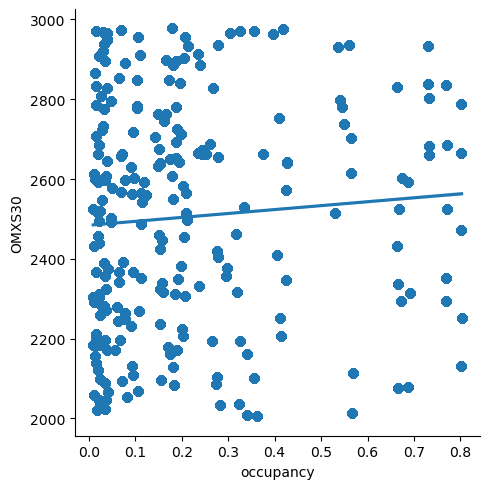

In [22]:
sns.lmplot(x='occupancy',y='OMXS30',data=merged_df)

In [23]:
print("")

In [24]:
y = merged_df['occupancy']

In [25]:
merged_df.columns.tolist()

['country_code',
 'brand',
 'contract_type',
 'leadtime_days',
 'occupancy_current',
 'occupancy_ly',
 'vacation_1',
 'vacation_2',
 'vacation_3',
 'is_covid_period',
 'occ_delta',
 'occ_delta1',
 'occ_delta3',
 'occ_delta7',
 'occ_delta14',
 'occ_delta30',
 'day',
 'month',
 'year',
 'weekday',
 'weekofyear',
 'occupancy',
 'predicted',
 'date',
 'Date',
 'OMXS30']

In [26]:
X = merged_df[[
 'brand',
 'contract_type',
 'leadtime_days',
 'occupancy_current',
 'occupancy_ly',
 'vacation_1',
 'vacation_2',
 'vacation_3',
 'is_covid_period',
 'occ_delta',
 'occ_delta1',
 'occ_delta3',
 'occ_delta7',
 'occ_delta14',
 'occ_delta30',
 'weekday',
 'weekofyear'
 ]]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression()

In [32]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

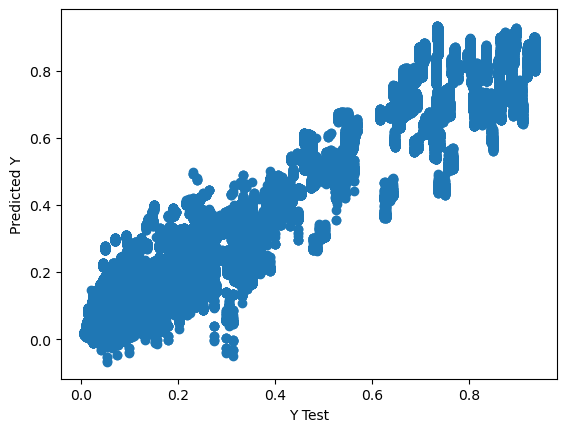

In [33]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.048443620894960404
MSE: 0.004610476797564645
RMSE: 0.06790049188013769


In [45]:
merged_df=merged_df.dropna()

In [46]:
y = merged_df['occupancy']

In [47]:
X = merged_df[[
 'brand',
 'contract_type',
 'leadtime_days',
 'occupancy_current',
 'occupancy_ly',
 'vacation_1',
 'vacation_2',
 'vacation_3',
 'is_covid_period',
 'occ_delta',
 'occ_delta1',
 'occ_delta3',
 'occ_delta7',
 'occ_delta14',
 'occ_delta30',
 'weekday',
 'weekofyear',
    'OMXS30'
 ]]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X_train,y_train)

LinearRegression()

In [52]:
merged_df=merged_df.dropna()

In [53]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

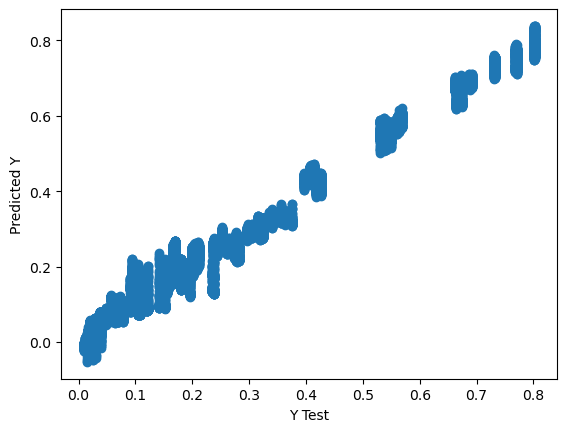

In [54]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.020621820186114078
MSE: 0.0007452806929903875
RMSE: 0.027299829541416326


In [56]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
brand,0.000000e+00
contract_type,8.434144e-15
leadtime_days,1.934988e-05
occupancy_current,1.213303e-01
occupancy_ly,8.430102e-01
vacation_1,-1.652006e-02
vacation_2,3.089310e-02
vacation_3,-1.602768e-03
is_covid_period,-1.665335e-16
occ_delta,6.140443e-01


In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
import lightgbm
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as plt

In [58]:
y = merged_df['occupancy']

In [59]:
X = merged_df[[
 'brand',
 'contract_type',
 'leadtime_days',
 'occupancy_current',
 'occupancy_ly',
 'vacation_1',
 'vacation_2',
 'vacation_3',
 'is_covid_period',
 'occ_delta',
 'occ_delta1',
 'occ_delta3',
 'occ_delta7',
 'occ_delta14',
 'occ_delta30',
 'weekday',
 'weekofyear',
    'OMXS30'
 ]]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((61156, 18), (26211, 18), (61156,), (26211,))

In [62]:
train_data = lightgbm.Dataset(X_train, label=y_train)
valid_data = lightgbm.Dataset(X_test, label=y_test)

In [63]:
parameters = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }

In [64]:
model_lgbm = lightgbm.train(parameters,
                            train_data,
                            valid_sets=valid_data,
                            num_boost_round=5000,
                            )

In [65]:
y_train_pred = model_lgbm.predict(X_train)
y_valid_pred = model_lgbm.predict(X_test)



In [73]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming merged_df is already defined and cleaned

# Define X and y
X = merged_df[[
    'brand', 'contract_type', 'leadtime_days', 'occupancy_current', 'occupancy_ly',
    'vacation_1', 'vacation_2', 'vacation_3', 'is_covid_period', 'occ_delta',
    'occ_delta1', 'occ_delta3', 'occ_delta7', 'occ_delta14', 'occ_delta30',
    'weekday', 'weekofyear', 'OMXS30'
]]
y = merged_df['occupancy']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

# Define the parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20
}

# Train the model with early stopping
lgbm_model = lgb.train(
    params,
    train_data,
    valid_sets=[valid_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=3),
    ]
)

# Make predictions
y_pred = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2604
[LightGBM] [Info] Number of data points in the train set: 69893, number of used features: 15
[LightGBM] [Info] Start training from score 0.215630
Training until validation scores don't improve for 3 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.000170996
Root Mean Squared Error: 0.00017099652618338164


In [74]:
X = merged_df[[
    'brand', 'contract_type', 'leadtime_days', 'occupancy_current', 'occupancy_ly',
    'vacation_1', 'vacation_2', 'vacation_3', 'is_covid_period', 'occ_delta',
    'occ_delta1', 'occ_delta3', 'occ_delta7', 'occ_delta14', 'occ_delta30',
    'weekday', 'weekofyear'
]]
y = merged_df['occupancy']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

# Define the parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20
}

# Train the model with early stopping
lgbm_model = lgb.train(
    params,
    train_data,
    valid_sets=[valid_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=3),
    ]
)

# Make predictions
y_pred = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2364
[LightGBM] [Info] Number of data points in the train set: 69893, number of used features: 14
[LightGBM] [Info] Start training from score 0.215630
Training until validation scores don't improve for 3 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.000163103
Root Mean Squared Error: 0.00016310351366300777
